# Generate figure 4
Figure 4 describes the results of all of our ART driven DBTL cycles.

- 4A: Schematic of ART process (not included here)
- 4B: Titer violin plot
- 4C: Normalized dCas9 violin plot
- 4D: % of strains passing filters
Other information:
- ART performance per cycle
- Identity of best strains
- Proteomics clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
import sys
sys.path.insert(0, '../')
from utils import set_plot_config

plot_config, palette = set_plot_config(return_configs=True)

In [2]:
OUTPUT_DIR = './figure files/figure 4/'

In [3]:
df = pd.read_csv('../df_target_all_TEST.csv', index_col = 0)
df
df['line_name_cycle'] = df.apply(lambda x: f"{x['line_name_norep']}-C{x['cycle']}" , axis = 1)

In [4]:
cycle_labels = [
    'DBTL0: Initial cycle',
    'DBTL1: Pseudorandom\n2x and 3x combinations',
    'DBTL2: ART designs\nfrom DBTL0-1',
    'DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid',
    'DBTL4: ART designs\nfrom DBTL3',
    'DBTL5: ART designs\nfrom DBTL3-4',
    'DBTL6: ART designs\nfrom DBTL3-5'
]

cycle_labels_thin = [    
    'DBTL0: Initial\ncycle',
    'DBTL1: Pseudo-\nrandom 2x and 3x\ncombinations',
    'DBTL2:\nART designs\nfrom DBTL0-1',
    'DBTL3: DBTL2 repeat\nwith improved dCas9\nplasmid',
    'DBTL4:\nART designs\nfrom DBTL3',
    'DBTL5:\nART designs\nfrom DBTL3-4',
    'DBTL6:\nART designs\nfrom DBTL3-5'
]
cycle_label_dict = {i:cycle_labels[i] for i in [0,1,2,3,4,5,6]}
cycle_label_dict_thin = {i:cycle_labels_thin[i] for i in [0, 1, 2, 3, 4, 5, 6]}
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])

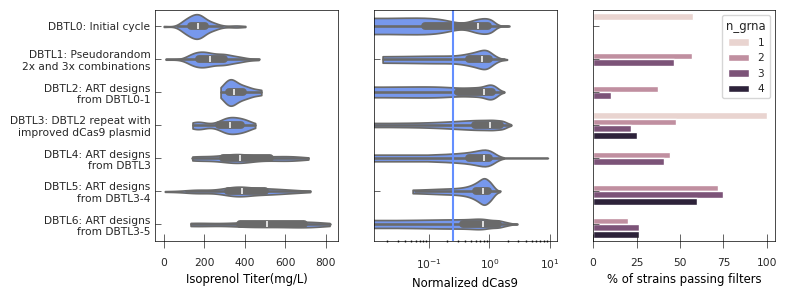

In [5]:
fig, ax = plt.subplots(
    ncols=3,
    nrows=1,
    figsize = (8, 3),
    sharey = True
)

# sns.violinplot(
#     data=df[df['to_keep_improved']],
#     x = 'isoprenol',
#     y = 'cycle_label',
#     orient = 'h',
#     cut = 0,
#     ax = ax[0],
# )

sns.violinplot(
    data=df[(df['to_keep_improved']) & (df['cycle'] >-1)],
    x = 'isoprenol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[0],
)


sns.violinplot(data = df,
    x = 'dCas9_normtocontrol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[1],
)           
ax[1].set_xscale('log')
ax[1].axvline(0.25)

cycle_list = []
n_grna_list = []
n_passing_list = []
n_total_list = []
for cycle in df['cycle'].unique():
    dfc = df[(df['cycle'] == cycle) & ~(df['is_control'])]
    for n in dfc['number_of_grna'].unique():
        n_passing = sum(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        n_total = len(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        cycle_list.append(cycle)
        n_grna_list.append(n)
        n_passing_list.append(n_passing)
        n_total_list.append(n_total)
df_pct_passing = pd.DataFrame.from_dict(
    {
        'cycle': cycle_list,
        'n_grna': n_grna_list,
        'n_passing': n_passing_list,
        'n_total': n_total_list
    }
)
df_pct_passing['pct_passing'] = 100 * df_pct_passing['n_passing']/df_pct_passing['n_total']
df_pct_passing['cycle_label'] = df_pct_passing['cycle'].apply(lambda x: cycle_label_dict[x])
sns.barplot(
    data = df_pct_passing,
    x = 'pct_passing', 
    y = 'cycle_label',
    hue = 'n_grna',
    orient='h'
)
ax[0].set_ylabel('')

x_labels = [
    'Isoprenol Titer(mg/L)',
    'Normalized dCas9',
    '% of strains passing filters'
]
for a, xl in zip(ax, x_labels):
    a.set_xlabel(xl)

In [6]:
df_pct_passing

,cycle,n_grna,n_passing,n_total,pct_passing,cycle_label
0,0,1,216,375,57.600000,DBTL0: Initial cycle
1,1,3,42,90,46.666667,DBTL1: Pseudorandom\n2x and 3x combinations
2,1,2,51,90,56.666667,DBTL1: Pseudorandom\n2x and 3x combinations
3,2,4,0,15,0.000000,DBTL2: ART designs\nfrom DBTL0-1
4,2,3,9,90,10.000000,DBTL2: ART designs\nfrom DBTL0-1
5,2,2,27,72,37.500000,DBTL2: ART designs\nfrom DBTL0-1
6,3,3,15,69,21.739130,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
7,3,2,36,75,48.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
8,3,4,3,12,25.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
9,3,1,6,6,100.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid


In [7]:
art_folders = [
    '../dbtl1_art_outputs/',
    '../dbtl2_art_outputs/',
    '../dbtl3ONLY_art_outputs/',
    '../dbtl4_art_outputs/',
    '../dbtl5_art_outputs/',
    '../dbtl6_art_outputs/'
]

In [8]:
art_cycles = [1,2,3,4,5,6]
# art_folders = [f'../dbtl{i}_art_outputs/' for i in art_cycles]
# art_folders[2] = 'dbtl3ONLY_art_outputs/'
df_column = '$R^2$'
df_row = 'Ensemble Model'
art_perf_df = pd.DataFrame.from_dict(
    {
        'folder': art_folders,
        'cycle': art_cycles,
        'name': [f'DBTL{i}' for i in art_cycles],
    }
)
art_perf_df[['r2', 'cv_r2']] = None
for idx, srs in art_perf_df.iterrows():
    if srs['cycle']==3:
        r2_df = pd.read_csv(f"{srs['folder']}metric0.csv", index_col = 0)
        r2_cv_df = pd.read_csv(f"{srs['folder']}cv_metric0.csv", index_col = 0)
    else:
        r2_df = pd.read_csv(f"{srs['folder']}metric_isoprenol.csv", index_col = 0)
        r2_cv_df = pd.read_csv(f"{srs['folder']}cv_metric_isoprenol.csv", index_col = 0)

    art_perf_df.loc[idx, 'Full'] = r2_df.loc[df_row, df_column]
    art_perf_df.loc[idx, '5-fold CV'] = r2_cv_df.loc[df_row, df_column]
art_perf_df_melt = pd.melt(art_perf_df, id_vars = 'name', value_vars = ['Full', '5-fold CV'],var_name='Dataset' )
art_perf_df_melt

,name,Dataset,value
0,DBTL1,Full,0.904311
1,DBTL2,Full,0.908956
2,DBTL3,Full,0.956492
3,DBTL4,Full,0.886727
4,DBTL5,Full,0.937853
5,DBTL6,Full,0.892261
6,DBTL1,5-fold CV,0.043039
7,DBTL2,5-fold CV,0.552922
8,DBTL3,5-fold CV,0.408193
9,DBTL4,5-fold CV,0.584166


Text(0, 0.5, '')

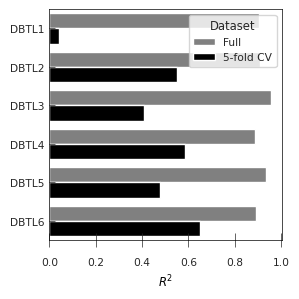

In [9]:
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = art_perf_df_melt, 
            y = 'name',
            x = 'value',
            hue = 'Dataset',
            palette=['gray', 'black']
           )
ax.set_xlabel(r'$R^2$')
ax.set_ylabel('')


## Plot ART performance

In [10]:
dbtl6_art_df = pd.read_csv('../dbtl6_art_outputs/art_performance_df_plotting.csv', index_col = 0)
dbtl6_art_df.head(3)

,true,pred,pred_cv,pred_cv_std
0,164.5141,184.757484,313.468952,75.805053
1,144.8960,184.757484,313.468952,75.805053
2,141.9620,184.757484,313.468952,75.805053


## Parent-child analysis

In [11]:
df['line_name_rep_cycle'] = df.apply(lambda x: f"{x['Line Name']}_c{x['cycle']}", axis = 1)

In [12]:
c3_strains = df.loc[df['cycle'] >=3, 'line_name_cycle'].values
unique_list = []
for s in c3_strains:
    if 'PP' in s:
        non_cycle_string = s[:-2]
        if '_P4' in non_cycle_string:
            non_cycle_string = non_cycle_string[:-3]
        grna = non_cycle_string.split('PP_')[1:]
        
        grna = [g[:-1] for g in grna]
        unique_list.extend(grna)
unique_list = list(set(unique_list))
unique_list.sort()
unique_list = [f'PP_{n}' for n in unique_list]

In [13]:
# target_pair_list_dict = {}
# for target in unique_list:
#     print('#'*20)
#     print(f'Target: {target}')
#     print('#'*20)
#     target_number = target[3:]
#     df['has_target'] = df['line_name_rep_cycle'].apply(lambda x: target in x)
#     strains_with_target =  df.loc[df['has_target'], 'line_name_cycle'].unique()
#     parent_child_list = []
#     for s in strains_with_target:
#         # print(f'strain: {s}')
#         non_cycle_string = s[:-2]
#         if '_P4' in non_cycle_string:
#             non_cycle_string = non_cycle_string[:-3]
#         #get individual genes as strings
#         grna = non_cycle_string.split('PP_')[1:]
#         # print(f'1) grna: {grna}')
#         #remove the underscore
#         grna = [g[:-1] for g in grna]
#         grna.remove(target_number)
#         # print(f'2) grna: {grna}')
#         # print(f'len: {len(grna)}')
    
#         #check to see if there's more than one gRNA (i.e. exclude the PP_0815 only strain)
#         if len(grna)>0:
#             #Look for any other strains with that collection of grna
#             parent_strain_idx = df['line_name_rep_cycle'].str.contains(grna[0])
#             # print(sum(parent_strain_idx))
#             for i in range(1,len(grna)):
#                 parent_strain_idx = parent_strain_idx & df['line_name_rep_cycle'].str.contains(grna[i])
#                 # print(sum(parent_strain_idx))
#             parent_strain_idx = parent_strain_idx & (df['number_of_grna'] == len(grna)) & (df['cycle'] != 2)
#             # print(sum(parent_strain_idx))
#             # print(len(df[parent_strain_idx]))
            
        
#             if len(df[parent_strain_idx])>0:
#                 # print(f'~~~~~~~~~~~~~~~~~~~~~~~~~ strain: {s} Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~')
#                 strain_list = [s]
#                 strain_list.extend([strain_name for strain_name in df.loc[parent_strain_idx, 'line_name_cycle'].unique()])
#                 parent_child_list.append(strain_list)
        
#     pair_list = [l for l in parent_child_list if len(l) == 2]  
#     target_pair_list_dict[target] = pair_list

# pass_fail_df = pd.DataFrame.from_dict(
#     {
#         'target': unique_list,
#         'n_pass': n_pass_list,
#         'n_fail': n_fail_list
#     }
# )

In [14]:
df

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,target_3_belowthresh,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved,line_name_cycle,cycle_label,line_name_rep_cycle
0,Control-R1,0,True,Control,0,177.33700,23396190.6,1.007405,NaN,NaN,...,False,False,True,True,True,NaN,True,Control-C0,DBTL0: Initial cycle,Control-R1_c0
1,Control-R10,0,True,Control,0,176.13507,28115139.4,1.275427,NaN,NaN,...,False,False,True,True,True,NaN,True,Control-C0,DBTL0: Initial cycle,Control-R10_c0
2,Control-R11,0,True,Control,0,192.63713,24151481.4,1.095618,NaN,NaN,...,False,False,True,True,True,NaN,True,Control-C0,DBTL0: Initial cycle,Control-R11_c0
3,Control-R12,0,True,Control,0,202.70480,26008612.7,1.179865,NaN,NaN,...,False,False,True,True,True,NaN,True,Control-C0,DBTL0: Initial cycle,Control-R12_c0
4,Control-R13,0,True,Control,0,123.84653,18057997.4,0.819190,NaN,NaN,...,False,False,True,True,True,NaN,True,Control-C0,DBTL0: Initial cycle,Control-R13_c0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.8,0.044699,PP_0813,PP_0815,...,False,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,DBTL6: ART designs\nfrom DBTL3-5,PP_0813_PP_0815_PP_1506-R2_c6
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.4,0.031779,PP_0813,PP_0815,...,False,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,DBTL6: ART designs\nfrom DBTL3-5,PP_0813_PP_0815_PP_1506-R3_c6
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,False,False,False,0.0,False,PP_1506_PP_4120-C6,DBTL6: ART designs\nfrom DBTL3-5,PP_1506_PP_4120-R1_c6
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,True,False,False,0.0,False,PP_1506_PP_4120-C6,DBTL6: ART designs\nfrom DBTL3-5,PP_1506_PP_4120-R2_c6


## BREAK

In [15]:
df_filter = df.loc[df['to_keep_improved']].copy(deep = True).reset_index(drop = True)

In [16]:
target_pair_list_dict = {}
targets_to_drop = []
for target in unique_list:
    # print('#'*20)
    # print(f'Target: {target}')
    # print('#'*20)
    target_number = target[3:]
    df_filter['has_target'] = df_filter['line_name_rep_cycle'].apply(lambda x: target in x)
    strains_with_target =  df_filter.loc[df_filter['has_target'], 'line_name_cycle'].unique()
    parent_child_list = []
    for s in strains_with_target:
        # print(f'strain: {s}')
        non_cycle_string = s[:-2]
        if '_P4' in non_cycle_string:
            non_cycle_string = non_cycle_string[:-3]
        #get individual genes as strings
        grna = non_cycle_string.split('PP_')[1:]
        # print(f'1) grna: {grna}')
        #remove the underscore
        grna = [g[:-1] for g in grna]
        grna.remove(target_number)
        # print(f'2) grna: {grna}')
        # print(f'len: {len(grna)}')
    
        #check to see if there's more than one gRNA (i.e. exclude the PP_0815 only strain)
        if len(grna)>0:
            #Look for any other strains with that collection of grna
            parent_strain_idx = df_filter['line_name_rep_cycle'].str.contains(grna[0])
            for i in range(1,len(grna)):
                parent_strain_idx = parent_strain_idx & df_filter['line_name_rep_cycle'].str.contains(grna[i])
            parent_strain_idx = parent_strain_idx & (df_filter['number_of_grna'] == len(grna)) & (df_filter['cycle'] != 2)        
            if len(df_filter[parent_strain_idx])>0:
                # print(f'~~~~~~~~~~~~~~~~~~~~~~~~~ strain: {s} Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~')
                strain_list = [s]
                strain_list.extend([strain_name for strain_name in df_filter.loc[parent_strain_idx, 'line_name_cycle'].unique()])
                parent_child_list.append(strain_list)
        
    pair_list = [l for l in parent_child_list if len(l) == 2]  
    print(f'Target: {target} - len(pair_list): {len(pair_list)}')
    if len(pair_list)>0:
        target_pair_list_dict[target] = pair_list
    else:
        targets_to_drop.append(target)
print(f'Removing N = {len(targets_to_drop)} targets with no parent-child relationships: {targets_to_drop}')
unique_list = [target for target in unique_list if target not in targets_to_drop]

Target: PP_0368 - len(pair_list): 24
Target: PP_0437 - len(pair_list): 10
Target: PP_0528 - len(pair_list): 12
Target: PP_0751 - len(pair_list): 20
Target: PP_0812 - len(pair_list): 27
Target: PP_0813 - len(pair_list): 23
Target: PP_0814 - len(pair_list): 23
Target: PP_0815 - len(pair_list): 30
Target: PP_1317 - len(pair_list): 9
Target: PP_1506 - len(pair_list): 1
Target: PP_1769 - len(pair_list): 0
Target: PP_2136 - len(pair_list): 13
Target: PP_4120 - len(pair_list): 4
Target: PP_4189 - len(pair_list): 22
Target: PP_4191 - len(pair_list): 1
Target: PP_4192 - len(pair_list): 4
Removing N = 1 targets with no parent-child relationships: ['PP_1769']


In [17]:
full_df_list = []
delta_df_list = []
for target in unique_list:
    print(target)
    df_list = []
    pair_list = target_pair_list_dict[target]
    print(len(pair_list))
    if len(pair_list) == 0:
        continue
    for l in pair_list:
        parent_strain = l[1]
        child_strain = l[0]
        parent_df = df_filter.loc[
            df_filter['line_name_cycle'] == parent_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        parent_df['is_parent'] = True
        parent_df['parent_strain'] = parent_strain
        child_df = df_filter.loc[
            df_filter['line_name_cycle'] == child_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        child_df['is_parent'] = False
        child_df['parent_strain'] = parent_strain
        df_list.extend([parent_df, child_df])
    
    parent_child_df = pd.concat(df_list)  
    parent_child_df['target'] = target

    full_df_list.append(parent_child_df)

    
    delta_df = pd.DataFrame.from_dict({'parent_strain':parent_child_df['parent_strain'].unique()})
    delta_df['parent_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['child_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (~parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['target_diff'] = delta_df['child_mean'] - delta_df['parent_mean']
    delta_df = delta_df.sort_values('target_diff')
    delta_df['target'] = target
    delta_df_list.append(delta_df)

full_delta_df = pd.concat(delta_df_list)
full_df = pd.concat(full_df_list)


PP_0368
24
PP_0437
10
PP_0528
12
PP_0751
20
PP_0812
27
PP_0813
23
PP_0814
23
PP_0815
30
PP_1317
9
PP_1506
1
PP_2136
13
PP_4120
4
PP_4189
22
PP_4191
1
PP_4192
4


In [18]:
full_delta_df['N_target'] = full_delta_df['target'].apply(lambda x: sum(full_delta_df['target'] == x))

In [19]:
full_delta_df['plot_name'] = full_delta_df.apply(
    lambda x: f"{x['target']} - N = {x['N_target']} pairs",
    axis = 1
)

In [20]:
parent_child_order_df = full_delta_df.loc[:, ['target_diff', 'plot_name']].groupby('plot_name').mean()
parent_child_order_df = parent_child_order_df.sort_values(by = 'target_diff', ascending = False)
parent_child_plot_order = parent_child_order_df.index

Text(0.5, 1.0, 'Parent-child analysis with FILTERED data')

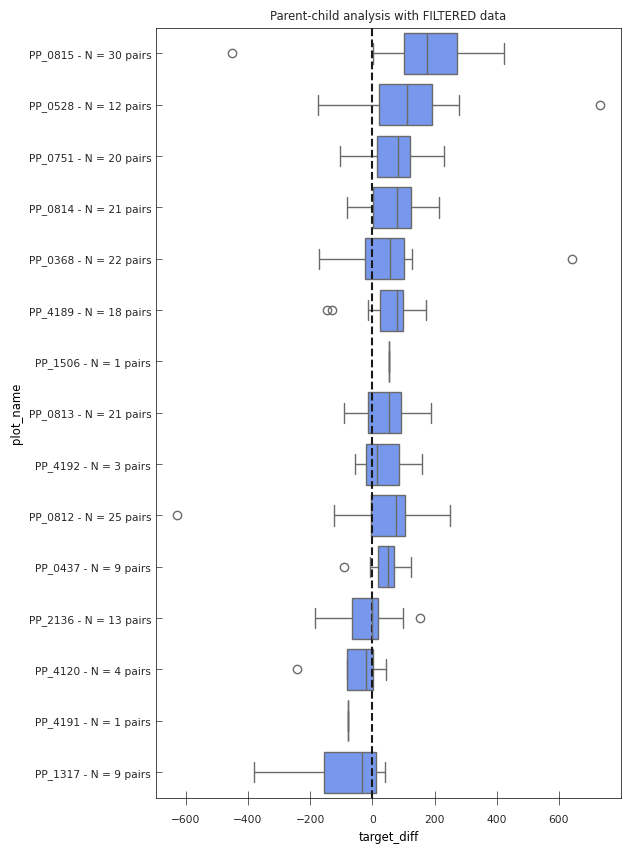

In [21]:
fig, ax = plt.subplots(figsize = (6, 10))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = parent_child_plot_order)
ax.axvline(0, c = 'k', linestyle = '--')
ax.set_title('Parent-child analysis with FILTERED data')

In [22]:
df2 = df.copy(deep = True)

n_pass_list = []
n_fail_list = []
n_missing_list = []
target_cols = [f'target_{i}' for i in [1, 2, 3, 4]]
for target in unique_list:
    df2['has_target'] = [target in line_name for line_name in df2['Line Name']]
    n_pass = 0
    n_fail = 0
    n_missing = 0
    for idx, srs in df2[df2['has_target']].iterrows():
        matching_target_column_list = [c for c in target_cols if srs[c] == target]
        assert len(matching_target_column_list) == 1, f'ERROR: none of {srs[target_cols]} match target: {target}'
        threshold_column = f'{matching_target_column_list[0]}_belowthresh'
        value_column = f'{matching_target_column_list[0]}_value'
        if np.isnan(srs[value_column]):
            n_missing +=1
        else:
            if srs[threshold_column]:
                n_pass+=1
            else:
                n_fail+=1
    n_pass_list.append(n_pass)
    n_fail_list.append(n_fail)
    n_missing_list.append(n_missing)
    # if target == 'PP_0815':
    #     break
    
pass_fail_df = pd.DataFrame.from_dict(
    {
        'target': unique_list,
        'n_pass': n_pass_list,
        'n_fail': n_fail_list,
        'n_missing': n_missing_list,
    }
)
pass_fail_df['n_total'] = pass_fail_df['n_pass'] + pass_fail_df['n_fail'] + pass_fail_df['n_missing']
pass_fail_df['pct_fail']= 100*pass_fail_df['n_fail']/pass_fail_df['n_total']
pass_fail_df_melt = pass_fail_df[['target', 'n_pass', 'n_fail', 'n_missing']].melt(id_vars = 'target')

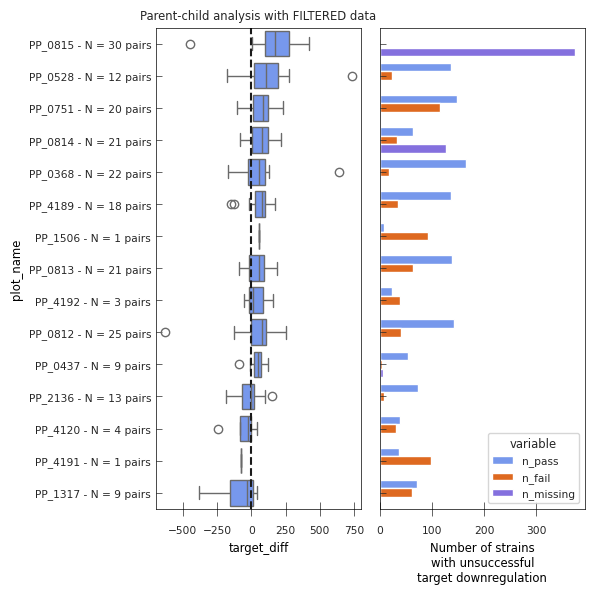

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (6, 6))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = parent_child_plot_order, ax = ax[0])
ax[0].axvline(0, c = 'k', linestyle = '--')
ax[0].set_title('Parent-child analysis with FILTERED data')

sns.barplot(pass_fail_df_melt, x = 'value', y = 'target',hue = 'variable', order = [po[:7] for po in parent_child_plot_order], ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Number of strains\nwith unsuccessful\ntarget downregulation')
ax[1].set_yticklabels([])
fig.tight_layout()

## Make a stacked bar graph
From: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

In [24]:
target_sort_order = [po[:7] for po in parent_child_plot_order]
target_sort_dict = dict(zip(target_sort_order, range(len(target_sort_order))))

variable_sort_order = ['n_pass', 'n_fail', 'n_missing']
variable_sort_dict = dict(zip(variable_sort_order, range(len(variable_sort_order))))

pass_fail_df['target_order'] = (
    pass_fail_df['target']
    .map(target_sort_dict)
)
pass_fail_df = (
    pass_fail_df
    .sort_values('target_order', ascending = False)
    .reset_index(drop = True)
)

Text(0.5, 0, 'Number of strains')

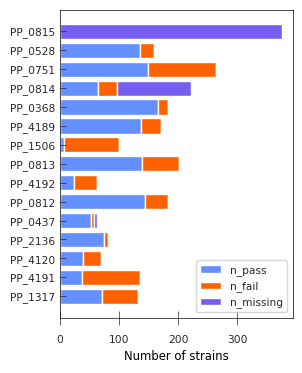

In [25]:
fig, ax = plt.subplots(figsize = (3,4))
number_of_targets_to_plot = len(unique_list)
left = np.zeros(number_of_targets_to_plot)
for plot_type in ['n_pass', 'n_fail', 'n_missing']:
    p = ax.barh(
        y = pass_fail_df['target'].values,
        width = pass_fail_df[plot_type].values, 
        label = plot_type, 
        left = left,
    )
    left +=  pass_fail_df[plot_type]
ax.legend()
ax.set_xlabel('Number of strains')

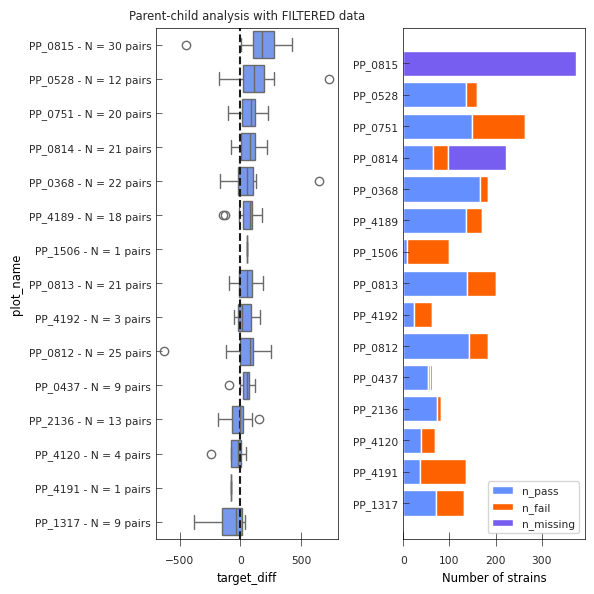

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (6, 6))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = parent_child_plot_order, ax = ax[0])
ax[0].axvline(0, c = 'k', linestyle = '--')
ax[0].set_title('Parent-child analysis with FILTERED data')

number_of_targets_to_plot = len(unique_list)
left = np.zeros(number_of_targets_to_plot)
for plot_type in ['n_pass', 'n_fail', 'n_missing']:
    p = ax[1].barh(
        y = pass_fail_df['target'].values,
        width = pass_fail_df[plot_type].values, 
        label = plot_type, 
        left = left,
    )
    left +=  pass_fail_df[plot_type]
ax[1].legend()
ax[1].set_xlabel('Number of strains')
fig.tight_layout()

## END PARENT CHILD ANALYSIS

## Set up full figure

In [27]:
image_location = './figure files/Figure 3A v1.png'
img = plt.imread(image_location)


In [28]:
count_df = pd.DataFrame.from_dict(
    {
        'cycle_label': df['cycle_label'].unique()
    }
)
for cl in count_df['cycle_label'].unique():
    print(cl)
    reps_above_thresh = df.loc[df['cycle_label'] == cl,
                'all_reps_above_dcas9_thresh'].sum()
    total_strains = len(df.loc[df['cycle_label'] == cl,
                'all_reps_above_dcas9_thresh'])
    failing_strains = total_strains - reps_above_thresh
    count_df.loc[count_df['cycle_label'] == cl, '% below dCas9 Thresh'] = (100*failing_strains/total_strains)
                                        
count_df

DBTL0: Initial cycle
DBTL1: Pseudorandom
2x and 3x combinations
DBTL2: ART designs
from DBTL0-1
DBTL3: DBTL2 repeat with
improved dCas9 plasmid
DBTL4: ART designs
from DBTL3
DBTL5: ART designs
from DBTL3-4
DBTL6: ART designs
from DBTL3-5


,cycle_label,% below dCas9 Thresh
0,DBTL0: Initial cycle,35.877863
1,DBTL1: Pseudorandom\n2x and 3x combinations,15.625000
2,DBTL2: ART designs\nfrom DBTL0-1,33.333333
3,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid,17.241379
4,DBTL4: ART designs\nfrom DBTL3,21.311475
5,DBTL5: ART designs\nfrom DBTL3-4,9.677419
6,DBTL6: ART designs\nfrom DBTL3-5,25.396825


In [29]:
def add_schematic_3A(ax = None, image_location = './Figure 3A v1.png'):
    if ax is None:
        fig, ax = plt.subplots()
    img = plt.imread(image_location)
    ax.imshow(img)
    ax.set_axis_off()

    
def add_titer_violin(df, ax = None, overlay = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2, 5))
    overlay_options = ['mean_only', None, 'box', 'quart', 'point', 'stick']
    assert overlay in overlay_options, f'ERROR: overlay type {overlay} is not allowed. Options are: {overlay_options}'
    add_violin_mean = False
    if overlay == 'mean_only':
        add_violin_mean = True
        overlay = None
    Y_AXIS_LABEL = 'cycle'
    #Update column names and contents for filtering
    df = df.rename(columns = {'to_keep_improved': 'Filter'})
    df['Filter'] = ['Pass' if x else 'Fail' for x in df['Filter']]
    
    vp = sns.violinplot(
        data=df[~df['is_control']],
        x = 'isoprenol',
        y = Y_AXIS_LABEL,
        orient = 'h',
        cut = 0,
        ax = ax,
        hue = 'Filter',
        inner = overlay, 
        hue_order = ['Pass', 'Fail'],
        palette = palette[:2],
    )
    
    if add_violin_mean:
        mean_df = df.loc[
                ~df['is_control'], ['Filter', 'isoprenol', 'cycle','cycle_label']
            ].groupby(['Filter', 'cycle', 'cycle_label']).mean()
        sns.boxplot(
            data = mean_df,
            x = 'isoprenol',
            y = Y_AXIS_LABEL,
            hue = 'Filter',
            orient = 'h',
            # palette = [to_rgba(hex_color) for hex_color in palette[:2]],
            palette = palette[:2],
            ax = vp,
            legend=None,
            hue_order = ['Pass', 'Fail']
        )
    # ax.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh', '3'])
    control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
    ax.axvline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
    ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]*1.1])
    ax.legend()
    ax.set_xlabel('Titer (mg/L)')
    ax.set_title('Isoprenol Titer in passing\nand failing strains')
    ax.set_ylabel('')

    if save_flag:
        figname = 'titer_violin'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
        
    
    
def add_dcas9_violin(df, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False

    if ax is None:
        fig, ax = plt.subplots(figsize = (2, 5))
    sns.violinplot(data = df,
        x = 'dCas9_normtocontrol',
        y = 'cycle_label',
        orient = 'h',
        cut = 0,
        ax = ax,
    )  
    ax.set_xlabel('Normalized dCas9 counts')
    ax.set_title('dCas9 counts')
    ax.axvline(0.25, c = 'k', linestyle = '--', label = 'dCas9\nfilter')
    # ax.set_yticklabels([])
    ax.legend()
    ax.tick_params(labelleft=False)
    ax.set_ylabel('')
    if save_flag:
        figname = 'dcas9_violin'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
       
def add_dcas9_pctbar(df, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2,2))
    
    count_df = pd.DataFrame.from_dict(
        {
            'cycle_label': df['cycle_label'].unique()
        }
    )
    for cl in count_df['cycle_label'].unique():
        print(cl)
        reps_above_thresh = df.loc[df['cycle_label'] == cl,
                    'all_reps_above_dcas9_thresh'].sum()
        total_strains = len(df.loc[df['cycle_label'] == cl,
                    'all_reps_above_dcas9_thresh'])
        failing_strains = total_strains - reps_above_thresh
        
        count_df.loc[count_df['cycle_label'] == cl, '% below dCas9 Thresh'] = (100*failing_strains/total_strains)    
        count_df.loc[count_df['cycle_label'] == cl, '% above dCas9 Thresh'] = (100*reps_above_thresh/total_strains)  
   
    sns.barplot(data = count_df,
        x = '% above dCas9 Thresh',
        y = 'cycle_label',
        orient = 'h',
        ax = ax,
    )  
    ax.set_xlabel('% of strains with\nsufficient dCas9')
    ax.set_title('dCas9 filter')
    # ax.axvline(0.25, c = 'k', linestyle = '--', label = 'dCas9\nfilter')
    # ax.set_yticklabels([])
    # ax.legend()
    # ax.set_xlim([0, 50])
    ax.tick_params(labelleft=False)
    ax.set_ylabel('')
    if save_flag:
        figname = 'dcas9_pct_bar'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
   
    
def add_filter_bargraph(df_pct_passing, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2,2))
    sns.barplot(
        data = df_pct_passing.rename(columns = {'n_grna': '# gRNA'}),
        x = 'pct_passing', 
        y = 'cycle_label',
        hue = '# gRNA',
        orient='h',
        ax = ax,
        palette= palette
    )
    # ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.tick_params(labelleft = False)
    ax.set_title('Filter passage\nby number of gRNA')
    ax.set_xlabel('% Passing')
    if save_flag:
        figname = 'filter_pass_bargraph'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
   

def add_art_performance_bargraph(art_df, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2,2))
    sns.barplot(data = art_perf_df_melt, 
                y = 'name',
                x = 'value',
                hue = 'Dataset',
                palette=['gray', 'black'],
                ax = ax
               )
    ax.set_xlabel(r"$R^2$")
    ax.set_ylabel('')
    ax.set_xlim([0, 1])
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
    )
    if save_flag:
        figname = 'art_performance_bargraph'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
   
    
def add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = False, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2,2))
    if cv:
        y_col = 'pred_cv'
        y_label = 'Cross Validated\nPred. Isoprenol (mg/L)'
        title_prefix = 'DBTL3-6 - Cross-validation:\n'
    else:
        y_col = 'pred'
        y_label = 'Pred. Isoprenol (mg/L)'
        title_prefix = 'DBTL3-6 - Final Model:\n'

        
    sns.scatterplot(
        data = perf_df,
        x = 'true', 
        y = y_col,
        alpha = 0.4,
        ax = ax
    )
    
    ax.set_xlabel('Measured Isoprenol (mg/L)')
    ax.set_ylabel(y_label)
    
    min_axlim = np.min(ax.get_xlim() + ax.get_ylim())
    max_axlim = np.max(ax.get_xlim() + ax.get_ylim())
    
    ax.set_xlim([min_axlim, max_axlim])
    ax.set_ylim([min_axlim, max_axlim])
    
    ax.axline((min_axlim, min_axlim), slope = 1, c = 'k', linestyle = '--')
    if title_stat:
        r2 = r2_score(perf_df['true'], perf_df[y_col])
        mae = mean_absolute_error(perf_df['true'], perf_df[y_col])
        subtext = f'= {r2:.2f}, MAE = {mae:.2f} mg/L'
        title_text = title_prefix + r'$R^2$ ' + subtext
        ax.set_title(title_text)
    if save_flag:
        
        base_name = 'ART_parity_plot'
        if cv:
            figname = base_name + '_cv'
        else:
            figname = base_name + '_full_model'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')

def plot_parent_child_analysis_both(delta_df, pass_fail_df, ax = None, out_dir = None):

    #https://seaborn.pydata.org/generated/seaborn.objects.Stack.html
    if out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize = (6,3),sharey = True, width_ratios = [1.5, 1, 1])

    sns.boxplot(full_delta_df, x = 'target_diff', y = 'target', order = [po[:7] for po in parent_child_plot_order], ax = ax[0])
    ax[0].axvline(0, c = 'k', linestyle = '--')
    ax[0].set_xlabel('$\Delta$ Isoprenol')
    ax[0].set_ylabel('')

    parent_child_count_df = pd.DataFrame(full_delta_df['target'].value_counts()).reset_index()
    sns.barplot(
        parent_child_count_df,
        y = 'target',
        x = 'count',
        order = [po[:7] for po in parent_child_plot_order], 
        ax = ax[1]
    )
    ax[1].set_xlabel('Number of pairs')
    
    
    number_of_targets_to_plot = len(unique_list)
    left = np.zeros(number_of_targets_to_plot)
    for plot_type in ['n_pass', 'n_fail', 'n_missing']:
        p = ax[2].barh(
            y = pass_fail_df['target'].values,
            width = pass_fail_df[plot_type].values, 
            label = plot_type, 
            left = left,
            edgecolor = 'k',
            linewidth = 0.5
        )
        left +=  pass_fail_df[plot_type]
    ax[2].legend()
    ax[2].set_xlabel('Number of strains')
    ax[2].set_ylabel('')
    # ax[2].set_yticklabels([])
    fig.tight_layout()

    if save_flag:
        figname = 'parent_child_analysis'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
   
#  def add_filter_bargraph(df_pct_passing, ax = None, out_dir = None):
           
#   fig, ax = plt.subplots(1, 2, figsize = (6, 6))
# sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = parent_child_plot_order, ax = ax[0])
# ax[0].axvline(0, c = 'k', linestyle = '--')
# ax[0].set_title('Parent-child analysis with FILTERED data')

# sns.barplot(pass_fail_df_melt, x = 'value', y = 'target',hue = 'variable', order = [po[:7] for po in parent_child_plot_order], ax = ax[1])
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Number of strains\nwith unsuccessful\ntarget downregulation')
# ax[1].set_yticklabels([])
# fig.tight_layout()  


<>:260: SyntaxWarning: invalid escape sequence '\D'
<>:260: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_8883/1379853760.py:260: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_xlabel('$\Delta$ Isoprenol')


### Run individual functions
def add_titer_violin(df, ax = None, overlay = None, out_dir = None):


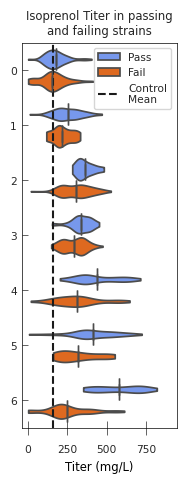

In [30]:
add_titer_violin(df, ax = None, overlay='mean_only', out_dir=OUTPUT_DIR)


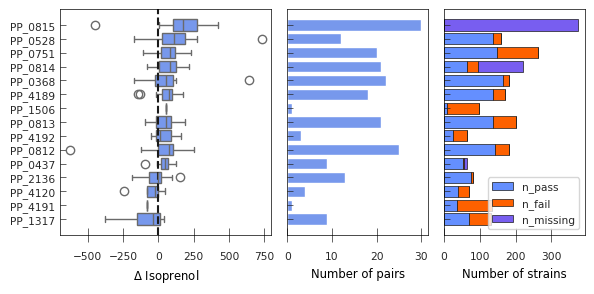

In [31]:
plot_parent_child_analysis_both(delta_df = full_delta_df, pass_fail_df = pass_fail_df, out_dir = None)


DBTL0: Initial cycle
DBTL1: Pseudorandom
2x and 3x combinations
DBTL2: ART designs
from DBTL0-1
DBTL3: DBTL2 repeat with
improved dCas9 plasmid
DBTL4: ART designs
from DBTL3
DBTL5: ART designs
from DBTL3-4
DBTL6: ART designs
from DBTL3-5


/tmp/ipykernel_8883/1379853760.py:150: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


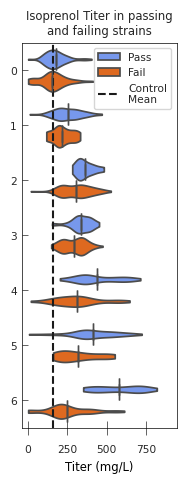

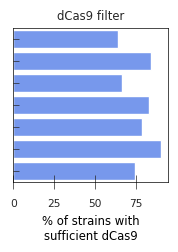

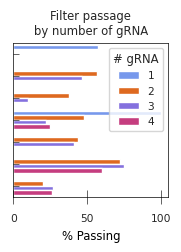

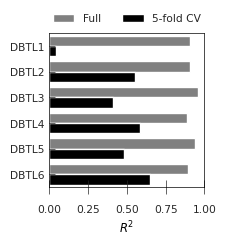

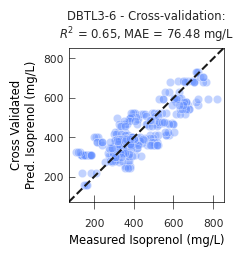

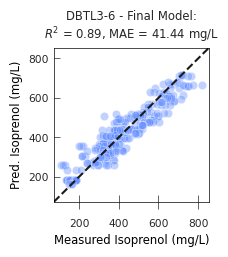

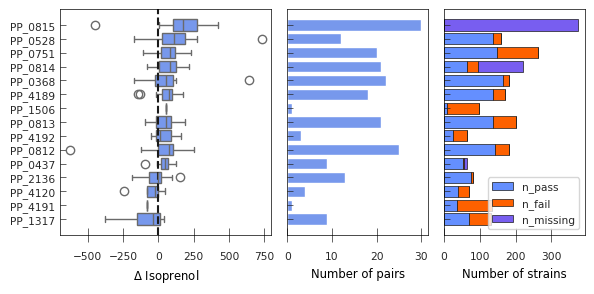

In [32]:
#Use plotting functions to add content to each axis
add_titer_violin(df, ax = None, overlay='mean_only', out_dir=OUTPUT_DIR)
# add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
add_dcas9_pctbar(df, ax = None, out_dir = OUTPUT_DIR)
add_filter_bargraph(df_pct_passing, ax=None, out_dir = OUTPUT_DIR)
add_art_performance_bargraph(art_perf_df_melt, ax=None, out_dir=OUTPUT_DIR)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = None, out_dir=OUTPUT_DIR)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = None, out_dir = OUTPUT_DIR)
plot_parent_child_analysis_both(delta_df = full_delta_df, pass_fail_df = pass_fail_df, out_dir = OUTPUT_DIR)


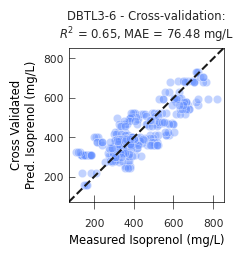

In [33]:
fig, ax = plt.subplots(figsize = (2, 2))
add_art_parity_plot(ax=ax, cv = True, title_stat=True)

Define proportions for figure

In [34]:
fig_h = 10.5
fig_w = 8

schematic = plt.imread('./Figure 3A v1.png')
schematic.shape
scheme_h, scheme_w = schematic.shape[:2]

scheme_ax_w = 0.95
scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h


## Bottom row of figures:
bottom_row_bottom = 0.05
bottom_row_left = 0.1
bottom_row_height = 0.15

perf_bargraph_width = 0.2

perf_scatter_cv_left = perf_bargraph_width + bottom_row_left + 0.1
perf_scatter_cv_width = 0.2

perf_scatter_left = perf_scatter_cv_left + perf_scatter_cv_width + 0.1
perf_scatter_width = 0.2

## middle row of figures

middle_row_bottom = bottom_row_height + 0.05
middle_row_left = 0.25
middle_row_height = 0.25







FileNotFoundError: [Errno 2] No such file or directory: './Figure 3A v1.png'

In [ ]:
#Create full figure
f = plt.figure(figsize = (8, 10.5))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (0.05, .6, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic)

#Add axes for other figure
ax_titer = f.add_axes(rect=(0.25, 0.30, 0.2, 0.25))
ax_dcas9 = f.add_axes(rect=(0.5, 0.30, 0.2, 0.25), sharey = ax_titer)
ax_filter = f.add_axes(rect=(0.75, 0.30, 0.2, 0.25), sharey = ax_dcas9)

ax_art_bargraph = f.add_axes(
    rect = (
        bottom_row_left,
        bottom_row_bottom,
        perf_bargraph_width,
        bottom_row_height
    )
)

ax_art_cv_perf = f.add_axes(
    rect = (
        perf_scatter_cv_left,
        bottom_row_bottom,
        perf_scatter_cv_width,
        bottom_row_height
    )
)

ax_art_perf = f.add_axes(
    rect = (
        perf_scatter_left,
        bottom_row_bottom,
        perf_scatter_width,
        bottom_row_height
    )
)

#Use plotting functions to add content to each axis
add_titer_violin(df, ax_titer, overlay='mean_only')
# add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
add_dcas9_pctbar(df, ax_dcas9)
add_filter_bargraph(ax_filter)
add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v2_dcas9bargraph.png', bbox_inches=None)
f.savefig('FIGURE3_v2_dcas9bargraph.pdf')
plt.show()

## For poster

In [ ]:
sns.set_theme(
    style="ticks",
    rc=plot_config,
    font="DejaVu Sans",
    font_scale=1.0
)

In [ ]:
sns.set_theme(
    font_scale = 1
)

In [ ]:
fig1, ax1 = plt.subplots(figsize = (4,4))
add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax1)
fig1.tight_layout()
fig1.savefig('poster_crossval_ART.png', dpi = 600, bbox_inches = None)

In [ ]:
fig2, ax2 = plt.subplots(figsize = (4,4))
add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax2)
fig2.tight_layout()
fig2.savefig('poster_full_ART.png', dpi = 600, bbox_inches = None)

In [ ]:
fig3, ax3 = plt.subplots(figsize = (8,8))

add_titer_violin(df, ax3, overlay='mean_only')
fig3.tight_layout()
fig3.savefig('poster_titer_violin.png', dpi = 600, bbox_inches = None)


# Version 2 - 

In [ ]:
fig_h = 8
fig_w = 8

schematic_thin = plt.imread('./Figure 3A v2 thin.png')
schematic_thin.shape
scheme_h, scheme_w = schematic_thin.shape[:2]

# scheme_ax_w = 0.2
# scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h

scheme_ax_h = 0.95
scheme_ax_w = scheme_ax_h * fig_h * scheme_w/scheme_h * 1/fig_w

## Bottom row of figures:
fig_bottom = 0.05
fig_left = 0.02
fig_height = 0.95

space_between_figures = 0.2
violin_left = fig_left + scheme_ax_w + space_between_figures
violin_width = 1 - space_between_figures-scheme_ax_w - 0.05

In [ ]:
violin_left

In [ ]:
violin_width

In [ ]:
#Create full figure
f = plt.figure(figsize = (fig_w, fig_h))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (fig_left, fig_bottom, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic, image_location = './Figure 3A v2 thin.png')

#Add axes for other figure
ax_titer = f.add_axes(rect=(violin_left, fig_bottom, violin_width, fig_height))


# #Use plotting functions to add content to each axis
#Note: Temporarily update the cycle labels:
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict_thin[x])
add_titer_violin(df, ax_titer, overlay='mean_only')
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])
# # add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
# add_dcas9_pctbar(df, ax_dcas9)
# add_filter_bargraph(ax_filter)
# add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v3_simple.png', bbox_inches=None)
f.savefig('FIGURE3_v3_simple.pdf')
plt.show()

# Version 3 - 

In [ ]:
scheme_h

In [ ]:
scheme_w

In [ ]:
fig_h = 10
fig_w = 8

schematic_thin = plt.imread('./Figure 3A v3 thin.png')
schematic_thin.shape
scheme_h, scheme_w = schematic_thin.shape[:2]

# scheme_ax_w = 0.2
# scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h

scheme_ax_h = 0.4
scheme_ax_w = scheme_ax_h * fig_h * scheme_w/scheme_h * 1/fig_w

## Bottom row of figures:
fig_bottom = 0.05
fig_left = 0.02
fig_height = 0.95

space_between_figures = 0.2
violin_left = fig_left + scheme_ax_w + space_between_figures
violin_width = 1 - space_between_figures-scheme_ax_w - 0.05

In [ ]:
violin_left

In [ ]:
violin_width

In [ ]:
#Create full figure
f = plt.figure(figsize = (fig_w, fig_h))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (fig_left, fig_bottom, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic, image_location = './Figure 3A v3 thin.png')

#Add axes for other figure
ax_titer = f.add_axes(rect=(violin_left, fig_bottom, violin_width, fig_height))


# #Use plotting functions to add content to each axis
#Note: Temporarily update the cycle labels:
df['cycle_label'] = df['cycle'].apply(lambda x: f'DBTL {x}')
add_titer_violin(df, ax_titer, overlay='mean_only')
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])
# # add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
# add_dcas9_pctbar(df, ax_dcas9)
# add_filter_bargraph(ax_filter)
# add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v4_simple.png', bbox_inches=None)
f.savefig('FIGURE3_v4_simple.pdf')
plt.show()

In [ ]:
%pip install ridgeplot

In [ ]:
import ridgeplot as rp

In [ ]:
# import numpy as np
# from ridgeplot import ridgeplot
# from ridgeplot.datasets import load_probly
# import plotly.io as pio
# pio.renderers.default = 'iframe'

# # Load the probly dataset
# df = load_probly()

# # Let's grab the subset of columns used in the example
# column_names = [
#     "Almost Certainly",
#     "Very Good Chance",
#     "We Believe",
#     "Likely",
#     "About Even",
#     "Little Chance",
#     "Chances Are Slight",
#     "Almost No Chance",
# ]
# df = df[column_names]

# # Not only does 'ridgeplot(...)' come configured with sensible defaults
# # but is also fully configurable to your own style and preference!
# fig = ridgeplot(
#     samples=df.to_numpy().T,
#     bandwidth=4,
#     kde_points=np.linspace(-12.5, 112.5, 500),
#     colorscale="viridis",
#     colormode="row-index",
#     opacity=0.6,
#     labels=column_names,
#     spacing=5 / 9,
# )

# # And you can still update and extend the final
# # Plotly Figure using standard Plotly methods
# fig.update_layout(
#     height=560,
#     width=800,
#     font_size=16,
#     plot_bgcolor="white",
#     xaxis_tickvals=[-12.5, 0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5],
#     xaxis_ticktext=["", "0", "", "25", "", "50", "", "75", "", "100", ""],
#     xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
#     yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
#     yaxis_title=dict(text="Assigned Probability (%)", font_size=13),
#     showlegend=False,
# )

# # Show us the work!
# fig.show()

In [ ]:
# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df2 = pd.DataFrame(dict(x=x, g=g))
# m = df2.g.map(ord)
# df2["x"] += m

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df2, row="g", hue="g", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

## Plot the median and max strain from each cycle

### Filtered data

In [ ]:
median_strain_list = []
best_strain_list = []
for c in df['cycle'].unique():
    print(c)
    dfm = df.loc[
        (df['cycle'] == c) & (df['to_keep_improved']) & ~(df['is_control']),
        ['isoprenol', 'line_name_cycle']
    ].groupby('line_name_cycle').mean().sort_values('isoprenol').reset_index()
    n_passing_strains = len(dfm)
    median_strain_idx = np.ceil((n_passing_strains-1)/2)
    median_strain = dfm.loc[median_strain_idx, 'line_name_cycle']
    best_strain = dfm.loc[n_passing_strains-1, 'line_name_cycle']

    median_strain_list.append(median_strain)
    best_strain_list.append(best_strain)
    
    
        

In [ ]:
df_summary = df.loc[(df['line_name_cycle'].isin(median_strain_list+best_strain_list)) | (df['is_control']), :].copy()
df_summary.loc[df_summary['line_name_cycle'].isin(median_strain_list), 'category'] = 'Median strain'
df_summary.loc[df_summary['line_name_cycle'].isin(best_strain_list), 'category'] = 'Best strain'
df_summary.loc[df_summary['is_control'], 'category'] = 'Control'


In [ ]:
fig, ax = plt.subplots()

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    # errorbar = None,
    linestyle = 'none',
    # marker = '_', 
    markersize = 5,
    # markeredgewidth = 3,
    hue_order = ['Best strain', 'Median strain', 'Control']
)

# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (4,4))
sns.stripplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    alpha = 0.4,
    legend = False,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']
)

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    errorbar = None,
    linestyle = 'none',
    marker = '_', 
    markersize = 10,
    markeredgewidth = 3,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']

)


# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()
ax.set_ylim([0, 850])
ax.set_title('FILTERED')
ax.set_xlabel('DBTL Cycle')
ax.set_ylabel('Isoprenol titer (mg/L)')

fig.savefig('./figures/dbtl_cycle_titer_summary_filtered.png')
fig.savefig('./figures/dbtl_cycle_titer_summary_filtered.pdf')


### unfiltered

In [ ]:
median_strain_list = []
best_strain_list = []
for c in df['cycle'].unique():
    print(c)
    dfm = df.loc[
        (df['cycle'] == c) & ~(df['is_control']),
        ['isoprenol', 'line_name_cycle']
    ].groupby('line_name_cycle').mean().sort_values('isoprenol').reset_index()
    n_passing_strains = len(dfm)
    median_strain_idx = np.ceil((n_passing_strains-1)/2)
    median_strain = dfm.loc[median_strain_idx, 'line_name_cycle']
    best_strain = dfm.loc[n_passing_strains-1, 'line_name_cycle']

    median_strain_list.append(median_strain)
    best_strain_list.append(best_strain)
    
    

df_summary = df.loc[(df['line_name_cycle'].isin(median_strain_list+best_strain_list)) | (df['is_control']), :].copy()
df_summary.loc[df_summary['line_name_cycle'].isin(median_strain_list), 'category'] = 'Median strain'
df_summary.loc[df_summary['line_name_cycle'].isin(best_strain_list), 'category'] = 'Best strain'
df_summary.loc[df_summary['is_control'], 'category'] = 'Control'

In [ ]:
fig, ax = plt.subplots(figsize = (4,4))
sns.stripplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    alpha = 0.4,
    legend = False,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']
)

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    errorbar = None,
    linestyle = 'none',
    marker = '_', 
    markersize = 10,
    markeredgewidth = 3,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']

)


# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()
ax.set_ylim([0, 850])
ax.set_title('ALL STRAINS')


fig.savefig('./figures/dbtl_cycle_titer_summary_unfiltered.png')
fig.savefig('./figures/dbtl_cycle_titer_summary_unfiltered.pdf')

# OLD

In [ ]:
df.columns

In [ ]:
f = {'isoprenol': ['mean', 'std'], 'cycle': 'first'}
df_mean_isoprenol = df[['line_name_cycle', 'isoprenol', 'cycle']].groupby('line_name_cycle').agg(f)
df_mean_isoprenol.columns = df_mean_isoprenol.columns.droplevel()